Explore the dataset folder:

In [5]:
import os

dataset_root = "/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection"

# Step 2: Recursively collect all jpg and png images from the dataset root
image_files = []
for root, dirs, files in os.walk(dataset_root):
    for file in files:
        if file.lower().endswith(('.jpg', '.png')):
            image_files.append(os.path.join(root, file))

print(f"Found {len(image_files)} images")
# Show first 10 files to check
print("Sample files:", image_files[:10])

Found 13945 images
Sample files: ['/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/30012020_090040image398293.jpg', '/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/a6f9c7a2e9fd11a348ec.jpg', '/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/06012020_084712image913220.jpg', '/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/03012020_104157image961259.jpg', '/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/Thumbnailb75f36416e0a9654cf1b_(1).jpg', '/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/22102020_154044image959306.jpg', '/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/25112020_111037image327083.jpg', '/kaggle/input/vehide-dataset-automatic-vehicle-damage-detection/validation/validation/04022020_110553image136077.jpg', '/kag

Import Libraries

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


Load images, convert to grayscale, resize

In [15]:
images = []
image_size = (128, 128)  # Fixed size for HOG

for f in image_files[:50]:  # Load first 10 images for demo
    img = cv2.imread(f)
    if img is None:
        continue  # Skip corrupted files
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, image_size)
    images.append(resized)

print(f"Loaded {len(images)} images")


Loaded 50 images


Compute HOG features and visualizations

In [16]:
from skimage.feature import hog

hog_features = []
hog_images = []

for img in images:
    # Compute HOG without multichannel argument
    feature, hog_image = hog(img,
                             pixels_per_cell=(8, 8),
                             cells_per_block=(2, 2),
                             visualize=True)
    hog_features.append(feature)
    hog_images.append(hog_image)


Visualize original images and HOG

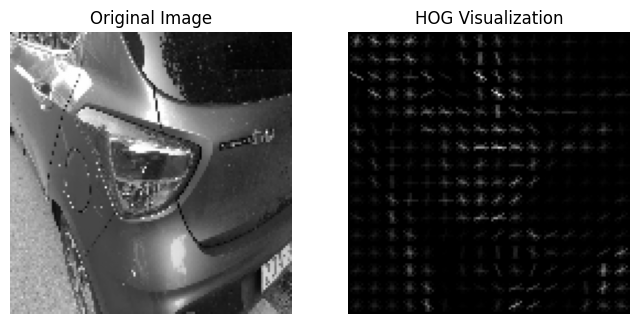

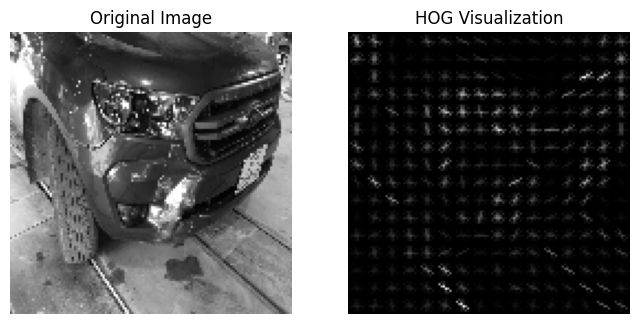

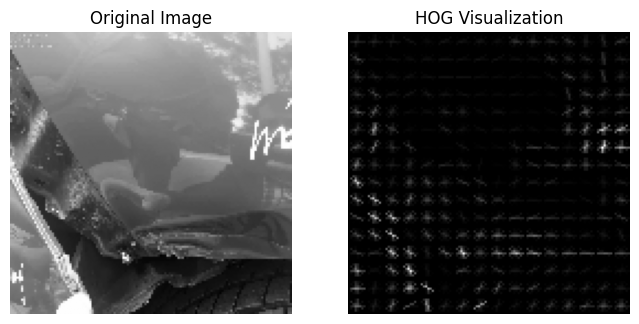

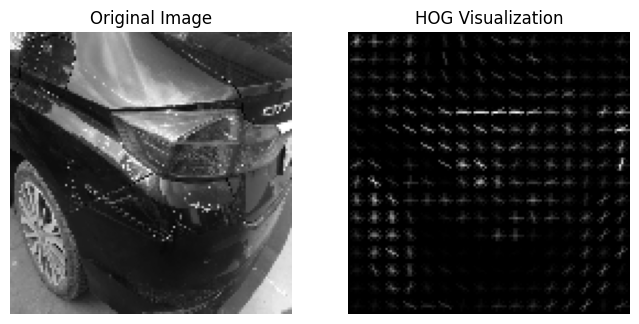

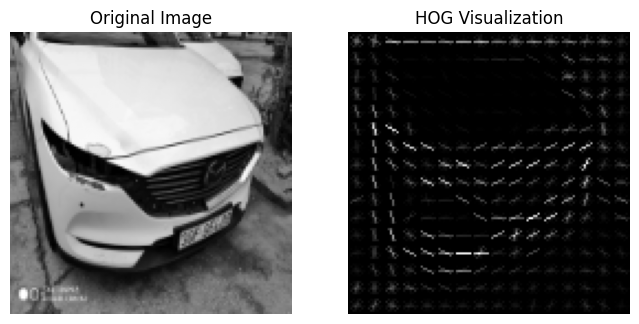

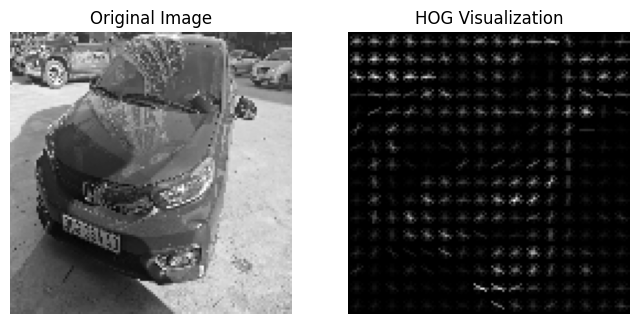

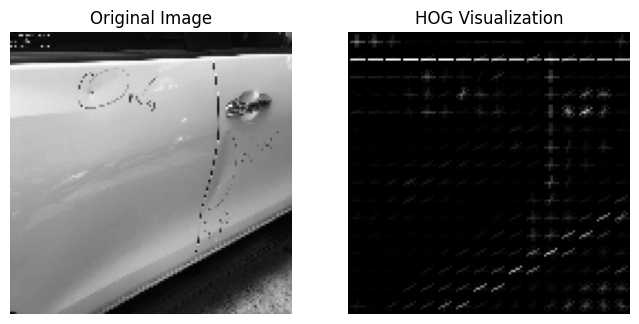

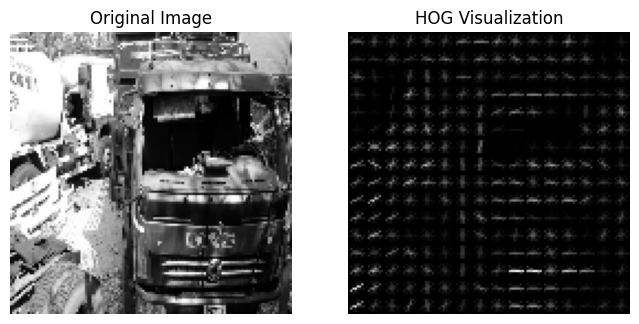

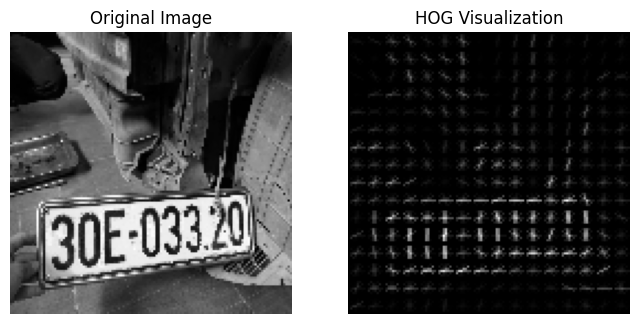

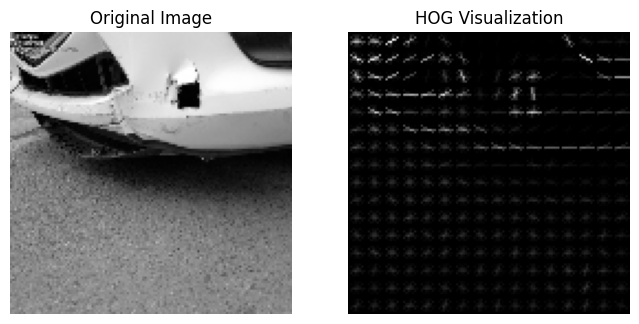

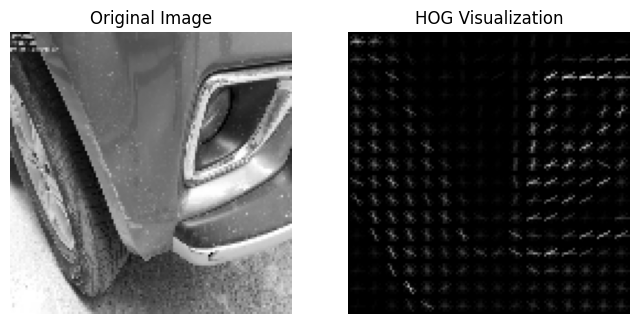

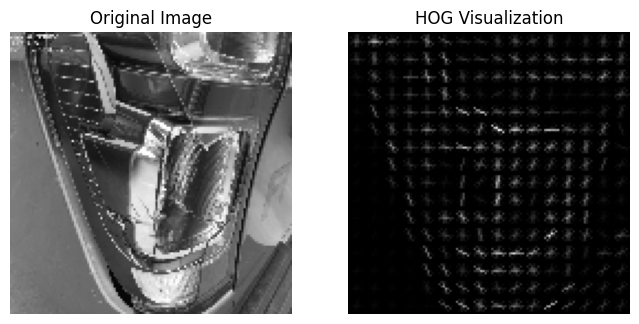

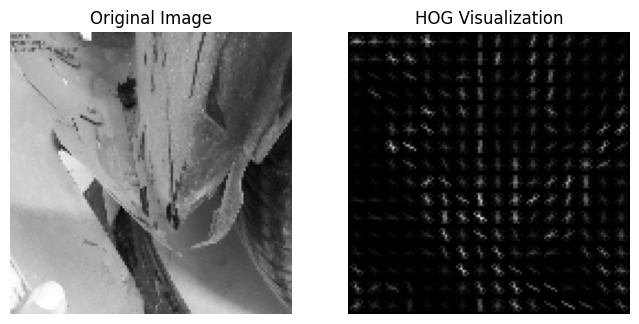

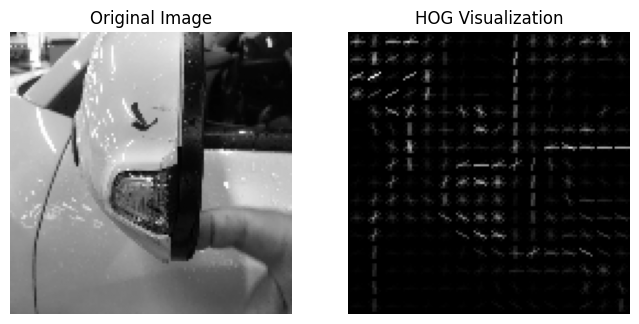

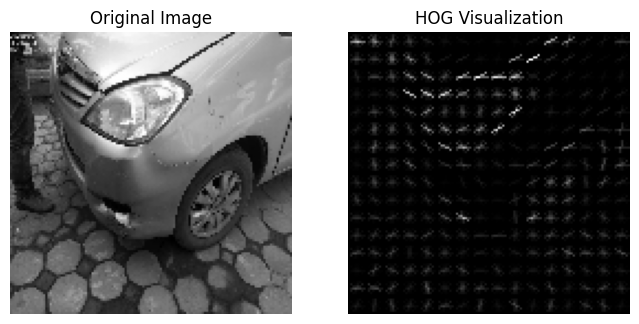

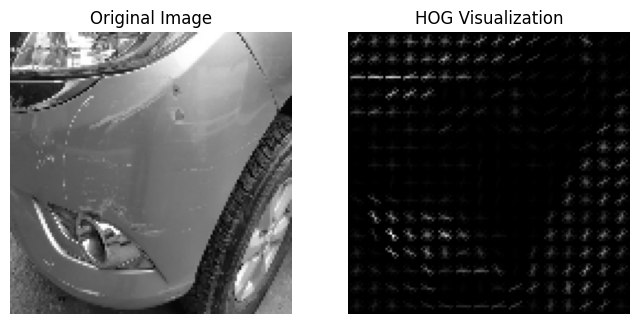

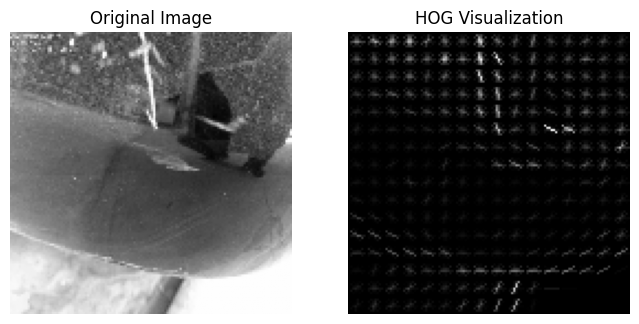

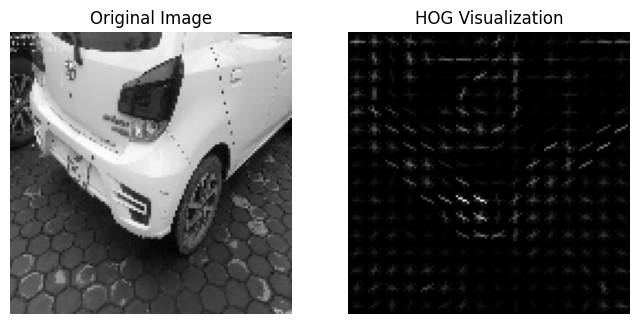

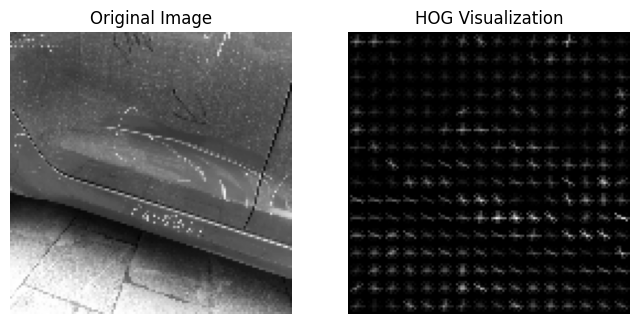

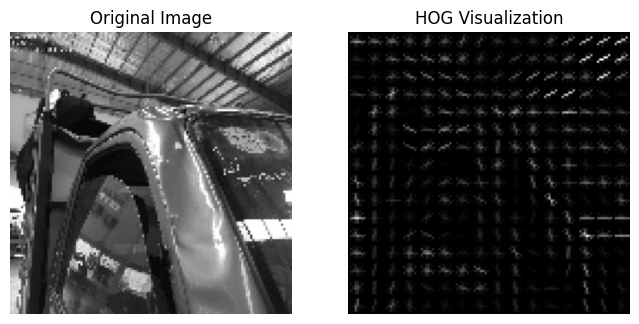

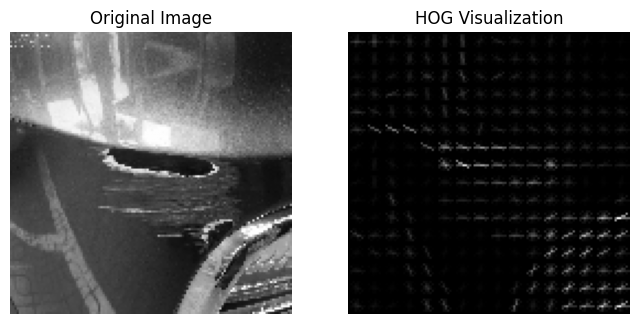

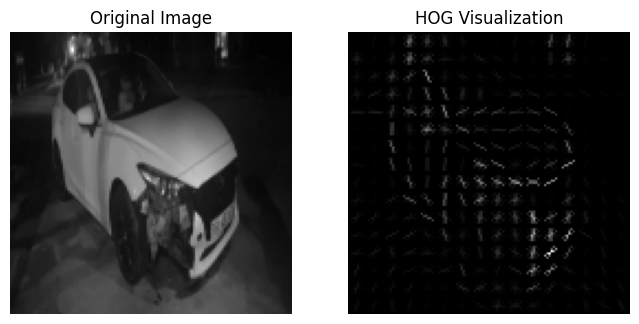

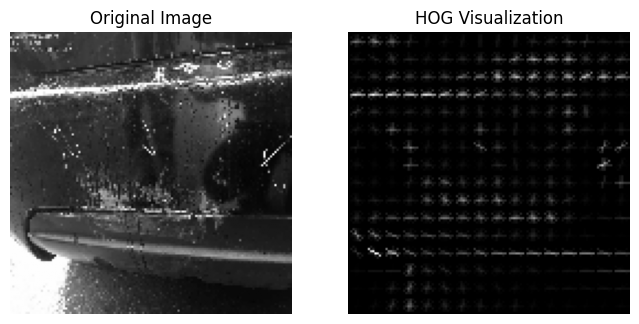

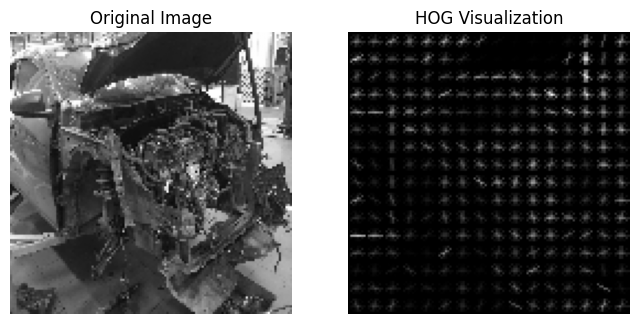

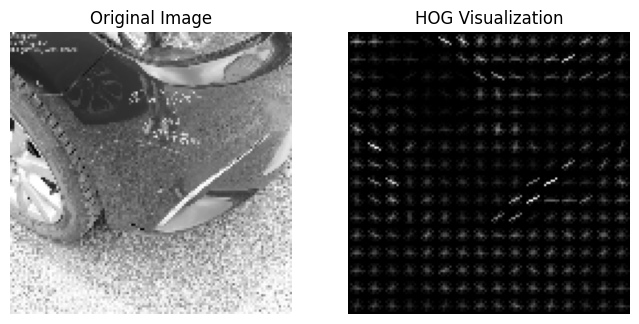

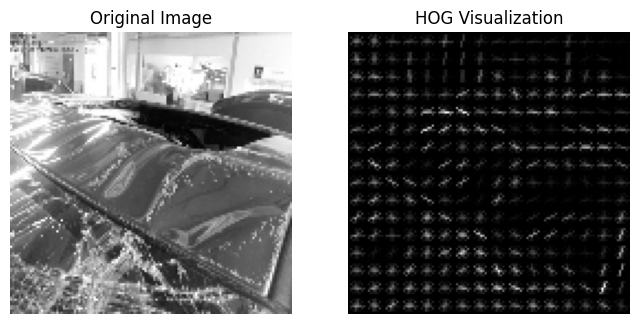

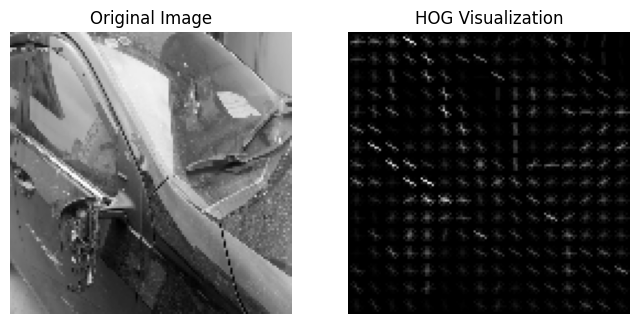

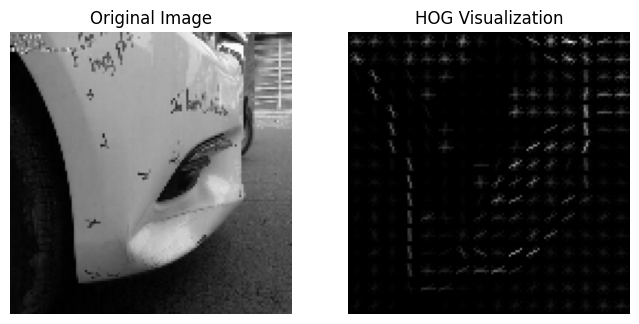

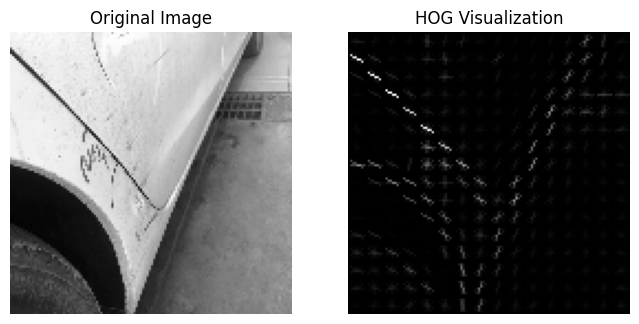

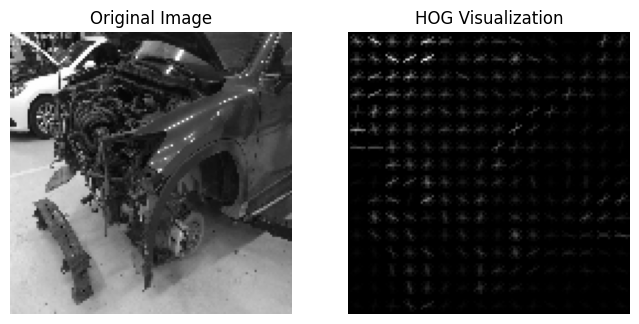

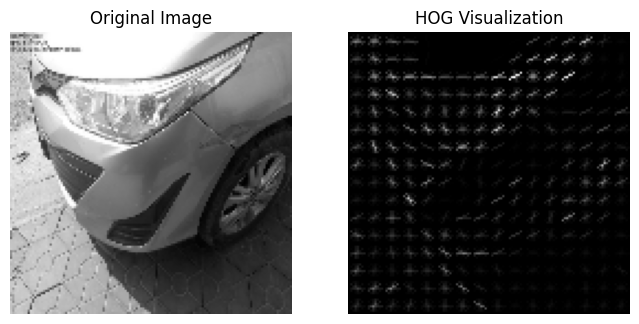

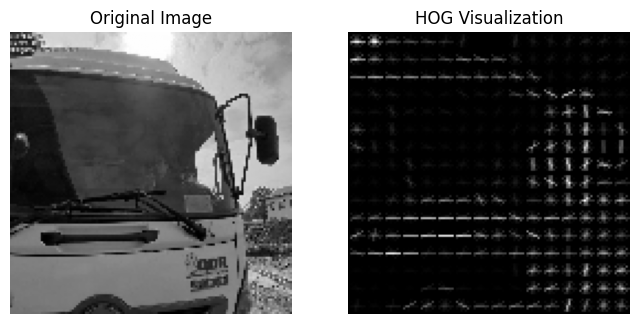

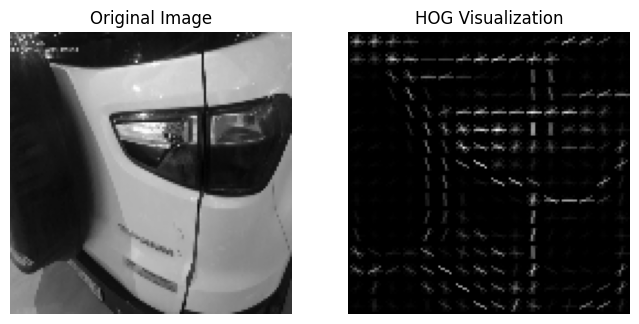

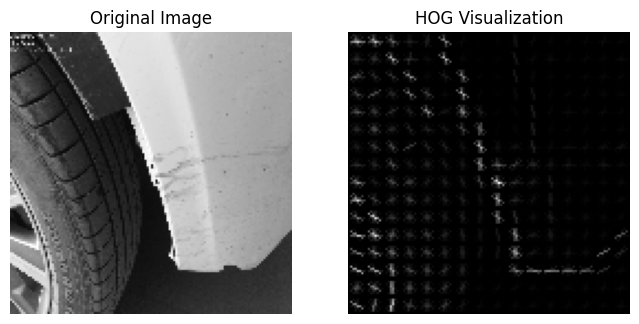

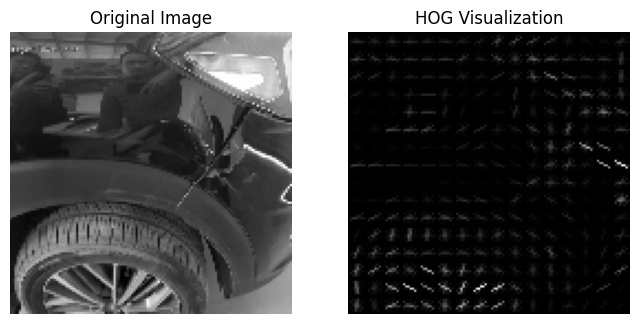

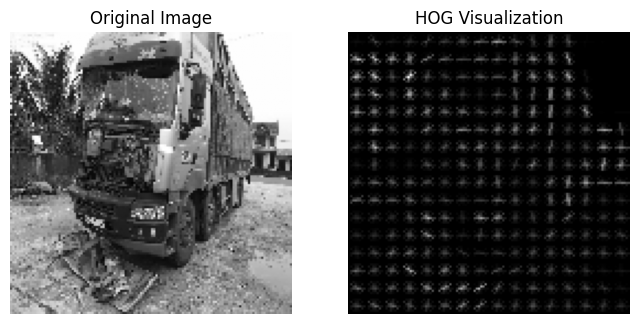

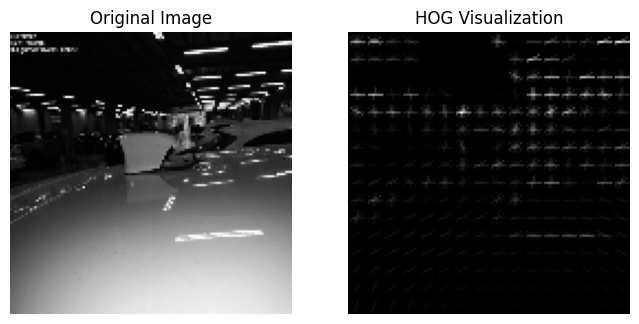

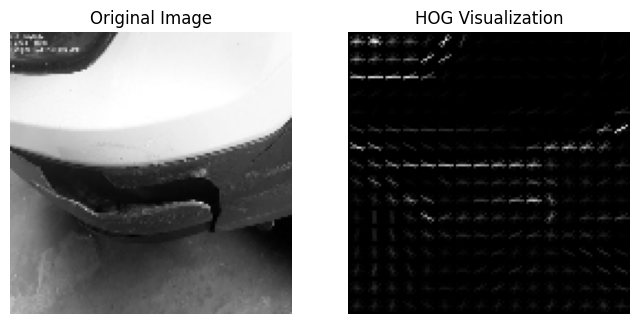

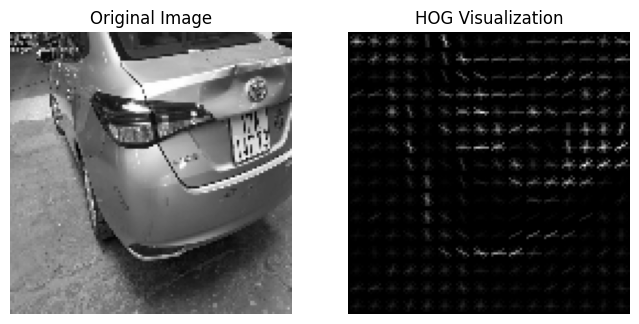

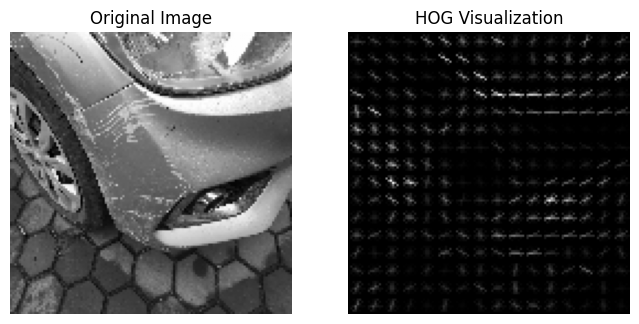

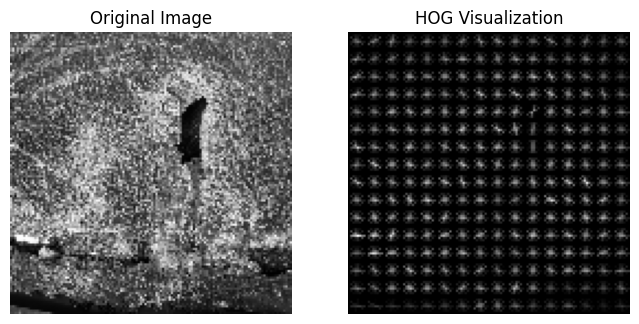

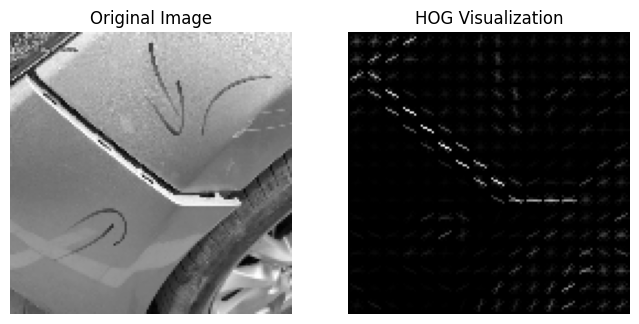

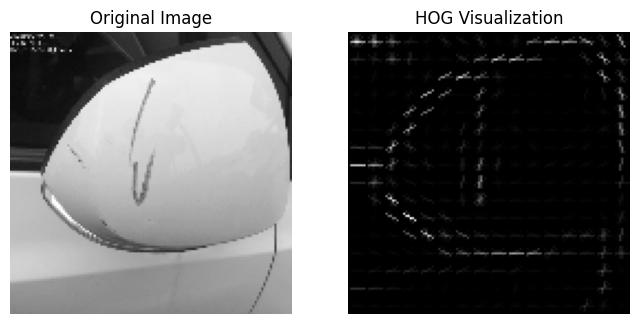

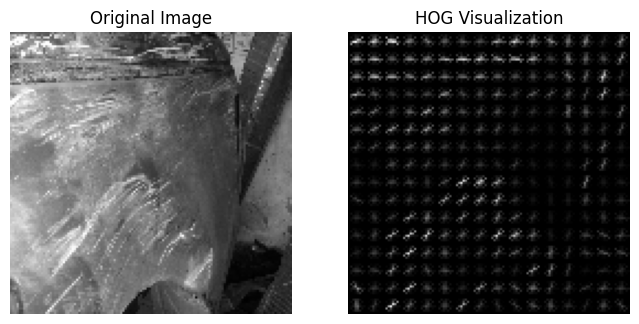

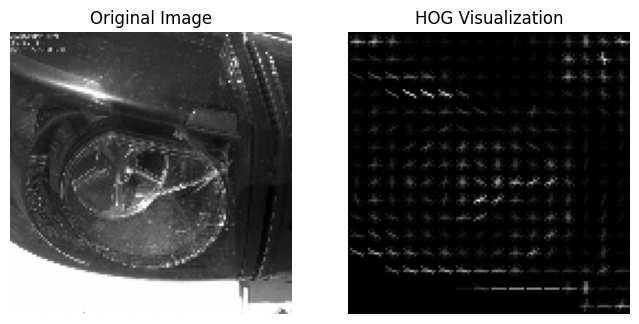

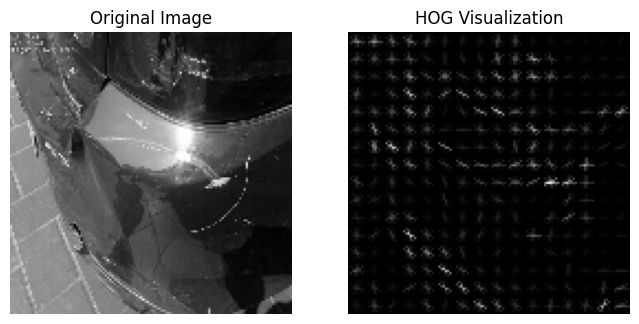

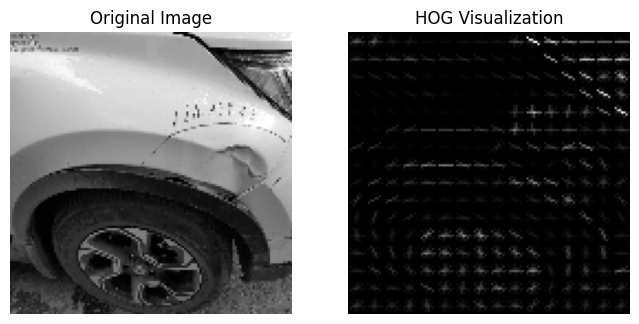

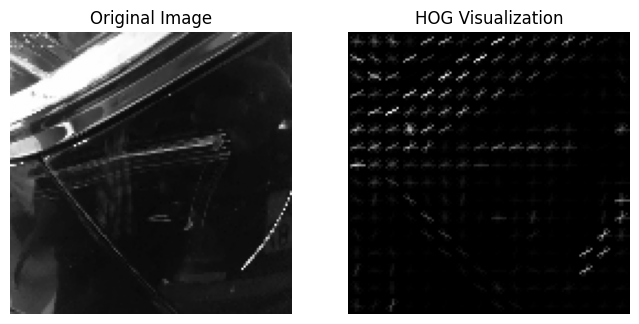

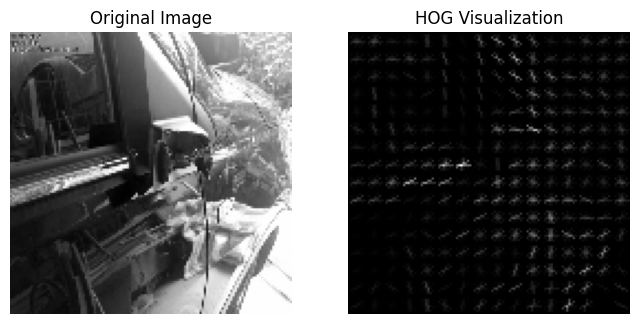

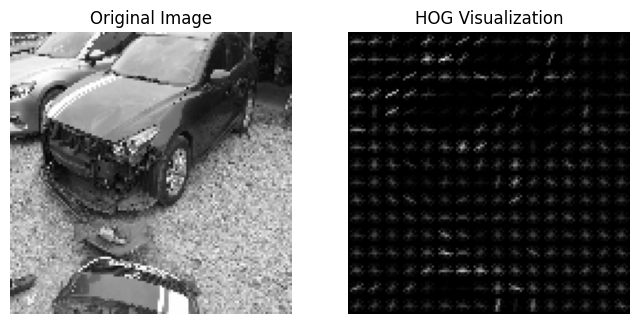

In [17]:
for i in range(len(images)):
    plt.figure(figsize=(8, 4))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(images[i], cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # HOG visualization
    plt.subplot(1, 2, 2)
    plt.imshow(hog_images[i], cmap='gray')
    plt.title("HOG Visualization")
    plt.axis('off')

    plt.show()


Dimensionality Reduction (PCA & t-SNE)

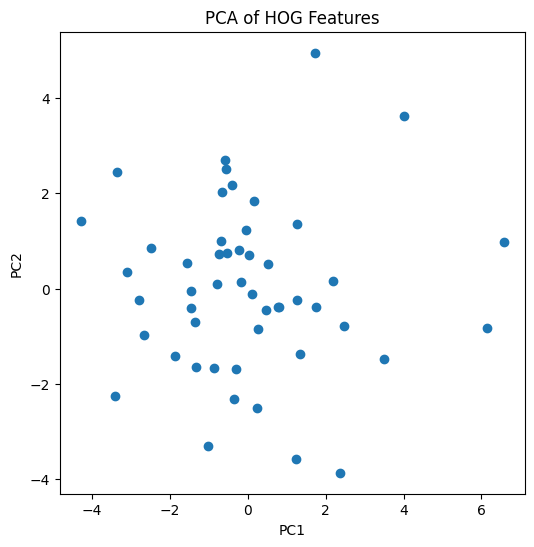

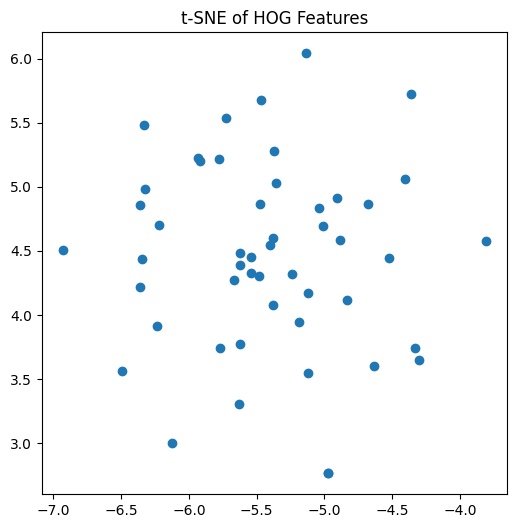

In [18]:
hog_features = np.array(hog_features)

if len(hog_features) > 0:
    # PCA
    pca = PCA(n_components=2)
    hog_pca = pca.fit_transform(hog_features)

    plt.figure(figsize=(6, 6))
    plt.scatter(hog_pca[:, 0], hog_pca[:, 1])
    plt.title("PCA of HOG Features")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    hog_tsne = tsne.fit_transform(hog_features)

    plt.figure(figsize=(6, 6))
    plt.scatter(hog_tsne[:, 0], hog_tsne[:, 1])
    plt.title("t-SNE of HOG Features")
    plt.show()
else:
    print("No HOG features to reduce. Check if images were loaded correctly.")


Reflection

In [19]:
print("""
HOG preserves local gradient and edge information, capturing shapes and contours.

HOG may struggle with complex damage patterns because:
- Subtle or irregular damage may not create strong gradients
- Color and texture information are ignored
- Damage location varies, reducing consistency across images
""")



HOG preserves local gradient and edge information, capturing shapes and contours.

HOG may struggle with complex damage patterns because:
- Subtle or irregular damage may not create strong gradients
- Color and texture information are ignored
- Damage location varies, reducing consistency across images

